<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Изменение-типов-данных-и-исправление-ошибок" data-toc-modified-id="Изменение-типов-данных-и-исправление-ошибок-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных и исправление ошибок</a></span></li><li><span><a href="#Расчёты-и-агрегирование-данных" data-toc-modified-id="Расчёты-и-агрегирование-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Расчёты и агрегирование данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей


*Примечание:*

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 

Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<div style="border:solid black 1px; padding: 20px">

**Описание данных**

Таблица users (информация о пользователях):
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Таблица calls (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
    
</div>

**Импорт библиотек**

In [1]:
# импортируем необходимые библиотеки

import pandas as pd              # библиотека pandas
import matplotlib.pyplot as plt  # модуль pyplot библиотеки matplotlib
import numpy as np               # библиотека numpy
import seaborn as sns            # библиотека seaborn
from scipy import stats as st    # модуль stats библиотеки scipy

## Изучение данных из файла

In [2]:
# чтение данных из файла и сохранение в users
users = pd.read_csv('/datasets/users.csv')

# выводим первые 10 строк users
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
# получим общую информацию о данных в users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# чтение данных из файла и сохранение в calls
calls = pd.read_csv('/datasets/calls.csv')

# выводим первые 10 строк calls
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
# получим общую информацию о данных в calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
# чтение данных из файла и сохранение в messages
messages = pd.read_csv('/datasets/messages.csv')

# выводим первые 10 строк messages
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
# получим общую информацию о данных в messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
# чтение данных из файла и сохранение в internet
internet = pd.read_csv('/datasets/internet.csv')

# выводим первые 10 строк internet
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
# получим общую информацию о данных в internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
# чтение данных из файла и сохранение в tariffs
tariffs = pd.read_csv('/datasets/tariffs.csv')

# выводим первые 10 строк tariffs
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
# получим общую информацию о данных в tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


<div style="border:solid green 3px; padding: 20px">

**Таблица users (информация о пользователях)**

Общее количество строк в датафрейме 500, столбцов 8, наименования столбцов отражают суть, содержащихся в них данных, и имеют корректные названия, встречающиеся типы данных - целые числа и строковые значения. Имеются пропущенные значения в `churn_date`, но из описания данных следует, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому оставим данные в этом столбце в первоначальном виде. Столбец `reg_date` — дата подключения тарифа (день, месяц, год) - имеет тип object, но поскольку в указанном столбце хранится дата, то на следующем шаге преобразуем тип данных в `reg_date` в специальный формат даты.

**Таблица calls (информация о звонках)**

Общее количество строк в датафрейме 202607, столбцов 4, наименования столбцов отражают суть, содержащихся в них данных, и имеют корректные названия, встречающиеся типы данных - вещественные и целые числа, строковые значения. Столбец `call_date` — дата звонка - имеет тип object, но поскольку в указанном столбце хранится дата, то на следующем шаге преобразуем тип данных в `call_date` в специальный формат даты.    

**Таблица messages (информация о сообщениях)**
    
Общее количество строк в датафрейме 123036, столбцов 3, наименования столбцов отражают суть, содержащихся в них данных, и имеют корректные названия, встречающиеся типы данных - целые числа и строковые значения. Столбец `message_date` — дата сообщения - имеет тип object, но поскольку в указанном столбце хранится дата, то на следующем шаге преобразуем тип данных в `message_date` в специальный формат даты.    


**Таблица internet (информация об интернет-сессиях)**
    
Общее количество строк в датафрейме 149396, столбцов 5. Имеется один столбец без наименования `Unnamed: 0`, но предположительно в данном столбце хранятся индексы, удалим данный столбец на следующем шаге, наименования остальных столбцов отражают суть, содержащихся в них данных, и имеют корректные названия, встречающиеся типы данных - вещественные и целые числа, строковые значения. Столбец `session_date` — дата интернет-сессии - имеет тип object, но поскольку в указанном столбце хранится дата, то на следующем шаге преобразуем тип данных в `session_date` в специальный формат даты.    

**Таблица tariffs (информация о тарифах)**
     
Общее количество строк в датафрейме 2, столбцов 8, наименования столбцов отражают суть, содержащихся в них данных, и имеют корректные названия, встречающиеся типы данных - целые числа и строковые значения. 

## Предобработка данных

### Обработка пропущенных значений

<div class="alert alert-block alert-info">
<font color='Black'>
    
Явные пропуски имеются только в датафрейме users в столбце `churn_date`, но из описания данных следует, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому оставим данные в этом столбце в первоначальном виде.

Попробуем найти неявные пропуски, для количественных переменных будем использовать метод describe, для переменных остальных типов проанализиуем уникальные значения.

In [12]:
# получим описательную статистику для количественных переменных
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [13]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['first_name'].sort_values().unique()

array(['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён',
       'Алан', 'Алевтина', 'Александр', 'Александра', 'Алексей', 'Алина',
       'Алиса', 'Алла', 'Альберта', 'Альбин', 'Альфред', 'Алёна',
       'Анатолий', 'Анвар', 'Ангелина', 'Андрей', 'Анжелика', 'Анита',
       'Антонина', 'Анфиса', 'Арина', 'Арнольд', 'Арсен', 'Арсений',
       'Артемий', 'Артём', 'Аурелия', 'Афанасий', 'Ахмет', 'Аюна',
       'Белла', 'Берта', 'Борис', 'Вадим', 'Валентина', 'Валерий',
       'Валерия', 'Варвара', 'Варлам', 'Василиса', 'Вениамин', 'Вера',
       'Вероника', 'Веселина', 'Виктор', 'Виктория', 'Виолетта',
       'Виталий', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Габриель', 'Габриэль', 'Гайдар', 'Галина', 'Гарри', 'Гектор',
       'Гелена', 'Геннадий', 'Геодар', 'Георгий', 'Георгина', 'Геральд',
       'Герасим', 'Глеб', 'Гордей', 'Григорий', 'Дайна', 'Дана', 'Даниил',
       'Даниэла', 'Дебора', 'Демьян', 'Денис', 'Джемма', 'Джозефина',
       'Джулия', '

In [14]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['last_name'].sort_values().unique()

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

In [15]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['reg_date'].sort_values().unique()

array(['2018-01-01', '2018-01-02', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-08', '2018-01-09', '2018-01-12',
       '2018-01-13', '2018-01-15', '2018-01-16', '2018-01-17',
       '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21',
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
       '2018-01-27', '2018-01-29', '2018-01-30', '2018-02-02',
       '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06',
       '2018-02-08', '2018-02-11', '2018-02-13', '2018-02-14',
       '2018-02-17', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-04',
       '2018-03-06', '2018-03-08', '2018-03-09', '2018-03-10',
       '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
       '2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19',
       '2018-03-20', '2018-03-22', '2018-03-24', '2018-03-25',
       '2018-03-26', '2018-03-28', '2018-04-01', '2018-

In [16]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['churn_date'].sort_values().unique()

array(['2018-08-17', '2018-08-31', '2018-09-02', '2018-09-26',
       '2018-09-27', '2018-10-03', '2018-10-04', '2018-10-05',
       '2018-10-14', '2018-10-25', '2018-10-27', '2018-10-28',
       '2018-11-07', '2018-11-13', '2018-11-16', '2018-11-21',
       '2018-11-22', '2018-11-26', '2018-11-27', '2018-11-30',
       '2018-12-03', '2018-12-09', '2018-12-11', '2018-12-14',
       '2018-12-16', '2018-12-18', '2018-12-20', '2018-12-21',
       '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-30', nan], dtype=object)

In [17]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [18]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
users['tariff'].sort_values().unique()

array(['smart', 'ultra'], dtype=object)

In [19]:
# получим описательную статистику для количественных переменных
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [20]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
calls['call_date'].sort_values().unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

In [21]:
# получим описательную статистику для количественных переменных
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [22]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
messages['message_date'].sort_values().unique()

array(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
       '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
       '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
       '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21',
       '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
       '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29',
       '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
       '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06',
       '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10',
       '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
       '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
       '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
       '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26',
       '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
       '2018-03-03', '2018-03-04', '2018-03-05', '2018-

In [23]:
# получим описательную статистику для количественных переменных
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [24]:
# выведем уникальные значения для указанного столбца, предварительно отсортировав значения по возрастанию
internet['session_date'].sort_values().unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

<div style="border:solid green 3px; padding: 20px">
    
В датафрейме internet в столбце `mb_used` имеются нулевые значения, возможно это интернет-сессии с неудачной попыткой соединения (для уточнения данного предположения лучше обратиться к заказчику исследования), поэтому оставим данные значения в исходном виде. В датафрейме calls в столбце `duration` из постановки задачи следует, что нулями обозначены пропущенные звонки, поэтому их также оставим в исходном виде. В остальных датафреймах неявные пропуски не обнаружены.

### Поиск дубликатов

<div class="alert alert-block alert-info">
<font color='Black'>
    
На основании исследования, проведенном на шаге 2.1 можно сделать вывод, что в столбцах рассматриваемых датафреймов неявные дубликаты отсутствуют. Проверим датафреймы на наличие явных дубликатов.    

In [25]:
# используем метод duplicated(), с помощью функции sum() найдем сумму элементов в полученном series 
users.duplicated().sum()

0

In [26]:
# используем метод duplicated(), с помощью функции sum() найдем сумму элементов в полученном series 
calls.duplicated().sum()

0

In [27]:
# используем метод duplicated(), с помощью функции sum() найдем сумму элементов в полученном series 
messages.duplicated().sum()

0

In [28]:
# используем метод duplicated(), с помощью функции sum() найдем сумму элементов в полученном series 
internet.duplicated().sum()

0

<div style="border:solid green 3px; padding: 20px">
    
В исходных датафреймах явные и неявные дубликаты не обнаружены.    

### Изменение типов данных и исправление ошибок

<div class="alert alert-block alert-info">
<font color='Black'>
    
В исходных датафреймах преобразуем столбцы, содержащие даты, к специальному типу даты: 
- users - столбец `reg_date` — дата подключения тарифа (день, месяц, год), столбец `churn_date` — дата прекращения пользования тарифом,
- calls - столбец `call_date` — дата звонка,    
- messages - столбец `message_date` — дата сообщения,    
- internet - столбец `session_date` — дата интернет-сессии. 

In [29]:
# переведем тип данных столбцов, содержащих даты, из строкового типа в тип даты
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [30]:
# проверим, что в датафрейме internet в столбце Unnamed: 0 содержится индекс
# для этого сравним построчно значение индекса со значением в столбце Unnamed: 0
# результат сохраним в check со значениями bool, найдем сумму элементов check
check = (internet.index != internet['Unnamed: 0'])
check.sum()

0

In [31]:
# удалим из датафрейма internet столбец Unnamed: 0
internet = internet[['id', 'mb_used', 'session_date', 'user_id']]

In [32]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


<div style="border:solid green 3px; padding: 20px">
    
В исходных датафреймах преобразовали столбцы, содержащие даты, к специальному типу datetime64[ns]:
    
- users - столбец `reg_date` — дата подключения тарифа (день, месяц, год), столбец `churn_date` — дата прекращения пользования тарифом,
- calls - столбец `call_date` — дата звонка,    
- messages - столбец `message_date` — дата сообщения.    
- internet - столбец `session_date` — дата интернет-сессии.       

В датафрейме internet удалили столбец без наименования `Unnamed: 0`, в котором хранились индексы.    

### Расчёты и агрегирование данных

<div class="alert alert-block alert-info">
<font color='Black'>

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
    
Учтем, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт.  
Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.    

In [33]:
# добавим в каждый из датафреймов calls, messages, internet столбец с номером месяца, 
# в котором произошло соответствующее действие
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [34]:
# добавим в датафрейм calls столбец duration_round с округленной вверх продолжительностью звонка
# и приведем значения в duration_round к целочисленному типу
calls['duration_round'] = np.ceil(calls['duration'])
calls['duration_round'] = calls['duration_round'].astype('int')

# построим сводную таблицу для calls, сгруппируем по user_id и по month значения столбца duration_round 
# и посчитаем количество сделанных звонков и израсходованных минут разговора
# сбросим индексы и добавим новый столбец с индексами в сводную таблицу
calls_pivot = (calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc=['count','sum'])
                    .reset_index())

# переименуем столбцы в calls_pivot для удобства дальнейшего использования
calls_pivot.columns = ['user_id', 'month', 'count_of_calls', 'duration_month']
calls_pivot

,user_id,month,count_of_calls,duration_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [35]:
# построим сводную таблицу для messages, сгруппируем по user_id и по month значения столбца id 
# и посчитаем количество отправленных сообщений за месяц
# сбросим индексы и добавим новый столбец с индексами в сводную таблицу
messages_pivot = (messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
                    .reset_index())

# переименуем столбцы в messages_pivot для удобства дальнейшего использования
messages_pivot.columns = ['user_id', 'month', 'count_of_messages']
messages_pivot

,user_id,month,count_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [36]:
# построим сводную таблицу для internet, сгруппируем по user_id и по month значения столбца mb_used 
# и посчитаем объём потраченного за месяц интернет-трафика (в мегабайтах)
# сбросим индексы и добавим новый столбец с индексами в сводную таблицу
internet_pivot = (internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
                    .reset_index())

# переименуем столбцы в internet_pivot для удобства дальнейшего использования
internet_pivot.columns = ['user_id', 'month', 'mb_used_month']
internet_pivot

,user_id,month,mb_used_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [37]:
# определим функцию, которая на вход получает объем интернет-трафика в мегабайтах и 
# возвращает округленное значение объема трафика в бо́льшую сторону в гигабайтах, 
# поскольку в 1 гигабайте 1024 мегабайта, то будем округлять, используя целочисленное деление и 
# остаток от деления объема трафика на 1024 
# если остаток от деления будет больше 0, то к целочисленному результату деления объема трафика на 1024 будем добавлять 1024

def round_traffic(traffic):
    if traffic % 1024 > 0:
        return ((traffic // 1024) + 1)
    else:
        return (traffic // 1024)

# добавим в internet_pivot столбец с округленным вверх объемом трафика за месяц
# и приведем значения в mb_used_round к целочисленному типу
internet_pivot['gb_used_month'] = internet_pivot['mb_used_month'].apply(round_traffic)
internet_pivot['gb_used_month'] = internet_pivot['gb_used_month'].astype('int')
internet_pivot

,user_id,month,mb_used_month,gb_used_month
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


In [38]:
# объединим сводные данные по пользователям и по месяцам: тариф, 
# количество и продолжительность звонков, количество сообщений 
# и объем интернет-трафика 

# выделим из users в отдельный датафрейм столбцы 'user_id', 'city', 'tariff'
# для оптимизации сводного датафрейма по количеству столбцов
users_pivot = users[['user_id', 'city', 'tariff']]

# объединим calls_pivot, messages_pivot, internet_pivot по столбцам 'user_id', 'month'
# используя внешнее соединение how='outer' 
# объединим полученный датафрейм с users_pivot по столбцу 'user_id'
# используя тип соединения how='left'
# во всех объединениях будем использовать внешнее соединение how='outer' 
# сбросим индексы и добавим новый столбец с индексами в сводную таблицу
grouped_data = (calls_pivot
                .merge(messages_pivot, on=['user_id','month'], how='outer')
                .merge(internet_pivot, on=['user_id','month'], how='outer')
                .merge(users_pivot, on='user_id', how='left')
                .reset_index(drop=True)
               )

# запполним пропуски в grouped_data значением 0
grouped_data = grouped_data.fillna(0)
grouped_data

,user_id,month,count_of_calls,duration_month,count_of_messages,mb_used_month,gb_used_month,city,tariff
0,1000,5,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14568.91,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,Санкт-Петербург,smart
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,Санкт-Петербург,smart
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,Санкт-Петербург,smart
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,Санкт-Петербург,smart


In [39]:
# сверка количества пользователей в исходной таблице и в объединенной таблице
(users['user_id'].count(), len(grouped_data['user_id'].unique()))

(500, 498)

In [40]:
# сверка количества минут в исходной таблице и в объединенной таблице
calls_pivot['duration_month'].sum() == grouped_data['duration_month'].sum()

True

In [41]:
# сверка числа сообщений в исходной таблице и в объединенной таблице
messages_pivot['count_of_messages'].sum() == grouped_data['count_of_messages'].sum()

True

In [42]:
# сверка объема интернет-трафика в исходной таблице и в объединенной таблице
internet_pivot['gb_used_month'].sum() == grouped_data['gb_used_month'].sum()

True

In [43]:
# функция find_earnings на входе получает строку row датафрейма grouped_data
# из датафрейма tariffs выбирается строка tariff с параметрами тарифа, соответствующего значению в row в столбце tariff
# далее в случае превышения суммарной продолжительности звонков minutes_up / количества сообщений messages_up /
# интернет трафика gb_up над бесплатным лимитом, превышение умножается на соответствуюшее значение из тарифного плана 
# значение трафика из tariff переводится в гигабайты, делением на 1024 мегабайта
# полученные значения складываются и к ним добавляется абонентская плата, соответствующая тарифному плану

def find_earnings(row):
    tariff = tariffs[tariffs['tariff_name'] == row['tariff']]
    minutes_up = 0
    messages_up = 0
    gb_up = 0
    if (row['duration_month'] - int(tariff['minutes_included'])) > 0: 
        minutes_up = (row['duration_month'] - int(tariff['minutes_included'])) * int(tariff['rub_per_minute'])  
    if (row['count_of_messages'] - int(tariff['messages_included'])) > 0: 
        messages_up = (row['count_of_messages'] - int(tariff['messages_included'])) * int(tariff['rub_per_message'])    
    if (row['gb_used_month'] - int(tariff['mb_per_month_included'])/1024) > 0: 
        gb_up = (row['gb_used_month'] - int(tariff['mb_per_month_included'])/1024) * int(tariff['rub_per_gb'])
    return (minutes_up + messages_up + gb_up + int(tariff['rub_monthly_fee']))

# добавим к grouped_data новый столбец earnings со значением выручки за месяц
# применив функцию find_earnings к строкам датафрейма grouped_data, используя функцию apply()
grouped_data['earnings'] = grouped_data.apply(find_earnings, axis=1)
grouped_data

,user_id,month,count_of_calls,duration_month,count_of_messages,mb_used_month,gb_used_month,city,tariff,earnings
0,1000,5,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,Санкт-Петербург,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,Санкт-Петербург,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,Санкт-Петербург,smart,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,Санкт-Петербург,smart,950.0


<div style="border:solid green 3px; padding: 20px">
    
Посчитали для каждого пользователя по месяцам:
- количество сделанных звонков `count_of_calls` и израсходованных минут разговора `duration_month` с учетом методики расчета оператора;
- количество отправленных сообщений `count_of_messages`;
- объем израсходованного интернет-трафика в гигабайтах `gb_used_month`;
- помесячную выручку с каждого пользователя `earnings`.
    
Расчет выручки произведен в предположении того, что плата за тариф взимается ежемесячно раз в месяц в незавимисимости от того, сколько дней в месяце пользователь был подключен к тарифу. Такое предположение было сделано ввиду того, что в условиях задачи отсутствуют пояснения относительно платы за тариф в случаях, когда пользователь был подключен не полный месяц (в частности не указывается, как рассчитывать лимиты звонков / сообщений / трафика за неполный месяц). Здесь требуются пояснения заказчика исследования.

## Анализ данных

<div class="alert alert-block alert-info">
<font color='Black'>

Проанализируем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Найдем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и проанализируем распределения.
    
Поскольку из условий задачи мы знаем, что исследуем небольшую выборку данных, то для расчета дисперсии и стандартного отклонения будем использовать формулы для оценки дисперсии и стандартного отклонения по выборке (несмещенные оценки).
    

In [44]:
# выделим срезы датафрейма grouped_data по тарифам ultra / smart
# в отдельные датафреймы ultra / smart
ultra = grouped_data.query('tariff == "ultra"')
smart = grouped_data.query('tariff == "smart"')

In [45]:
# выведем результаты расчета среднего, дисперсии и стандратного отклонения для минут, сообщений и интернет-трафика
# в виде таблицы в разрезе тарифов ultra / smart, для расчета статистик воспользуемся методами из библиотеки numpy
# np.var(), np.std()
result = pd.DataFrame(data=[[ultra['duration_month'].mean(), smart['duration_month'].mean()],
                            [np.var(ultra['duration_month'], ddof=1), np.var(smart['duration_month'], ddof=1)],
                            [np.std(ultra['duration_month'], ddof=1), np.std(smart['duration_month'], ddof=1)],
                            [ultra['count_of_messages'].mean(), smart['count_of_messages'].mean()],
                            [np.var(ultra['count_of_messages'], ddof=1), np.var(smart['count_of_messages'], ddof=1)],
                            [np.std(ultra['count_of_messages'], ddof=1), np.std(smart['count_of_messages'], ddof=1)],   
                            [ultra['gb_used_month'].mean(), smart['gb_used_month'].mean()],
                            [np.var(ultra['gb_used_month'], ddof=1), np.var(smart['gb_used_month'], ddof=1)],
                            [np.std(ultra['gb_used_month'], ddof=1), np.std(smart['gb_used_month'], ddof=1)]
                           ], 
                      index=['mean_minutes','var_minutes','std_minutes', 
                             'mean_messages','var_messages','std_messages',
                             'mean_gb','var_gb','std_gb'], 
                      columns=['ultra', 'smart'])
result

,ultra,smart
mean_minutes,526.623350,417.934948
var_minutes,100873.633397,36219.315784
std_minutes,317.606098,190.313730
mean_messages,49.363452,33.384029
var_messages,2285.266143,796.812958
std_messages,47.804457,28.227876
mean_gb,19.494416,16.328847
var_gb,97.091686,33.028705
std_gb,9.853511,5.747061


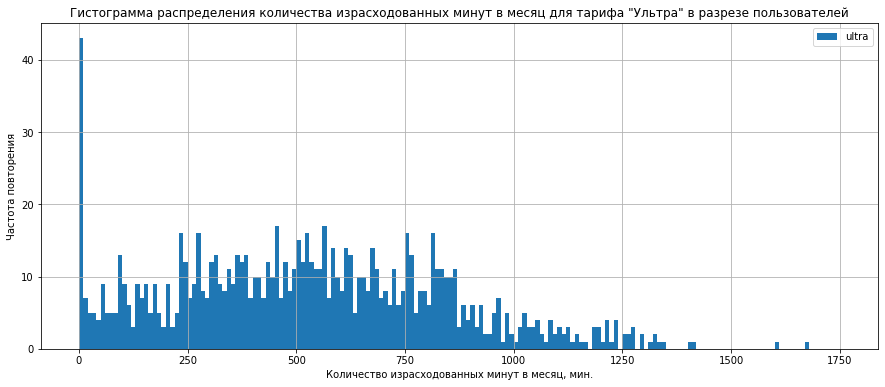

In [46]:
# построим гистограмму для duration_month
ax = ultra.plot(
            kind='hist',
            y='duration_month',
            range=(0, 1750),
            bins=175,
            linewidth=5,
            alpha=1.0,
            label='ultra',
            figsize=(15,6),
            grid = True);

# заголовок
ax.title.set_text('Гистограмма распределения количества израсходованных минут в месяц для тарифа "Ультра" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Количество израсходованных минут в месяц, мин.');
ax.set_ylabel('Частота повторения');

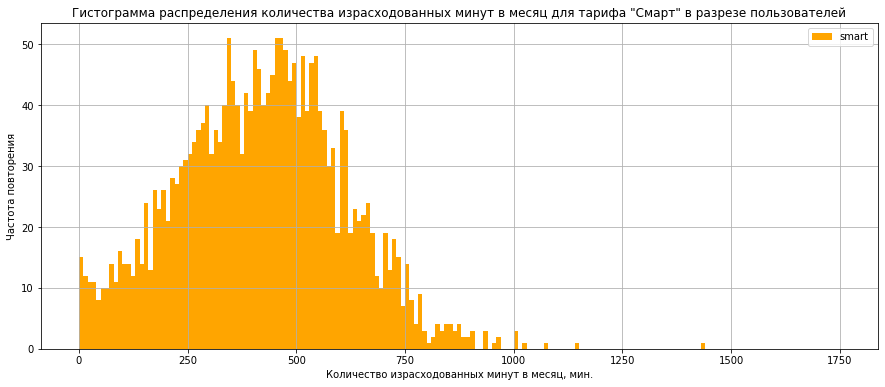

In [47]:
# построим гистограмму для duration_month
ax = smart.plot(
            kind='hist',
            y='duration_month',
            range=(0, 1750),
            bins=175,
            linewidth=5,
            alpha=1.0,
            label='smart',
            figsize=(15,6),
            grid = True,
            color = 'orange');
# заголовок
ax.title.set_text('Гистограмма распределения количества израсходованных минут в месяц для тарифа "Смарт" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Количество израсходованных минут в месяц, мин.');
ax.set_ylabel('Частота повторения');

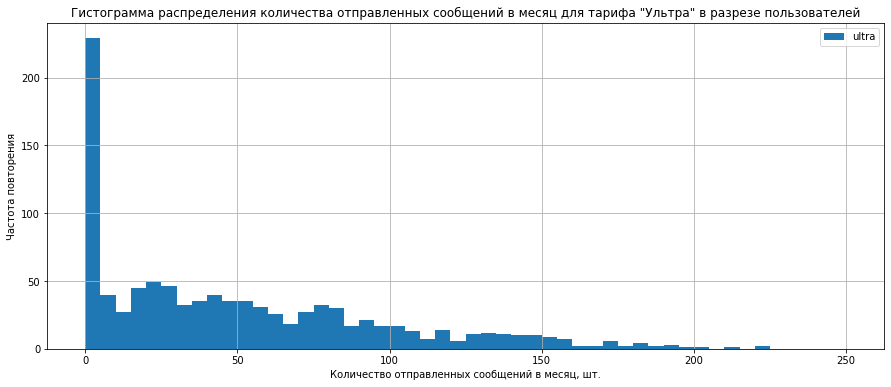

In [48]:
# построим гистограмму для count_of_messages
ax = ultra.plot(
            kind='hist',
            y='count_of_messages',
            range=(0, 250),
            bins=50,
            linewidth=5,
            alpha=1.0,
            label='ultra',
            figsize=(15,6),
            grid = True);

# заголовок
ax.title.set_text('Гистограмма распределения количества отправленных сообщений в месяц для тарифа "Ультра" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Количество отправленных сообщений в месяц, шт.');
ax.set_ylabel('Частота повторения');

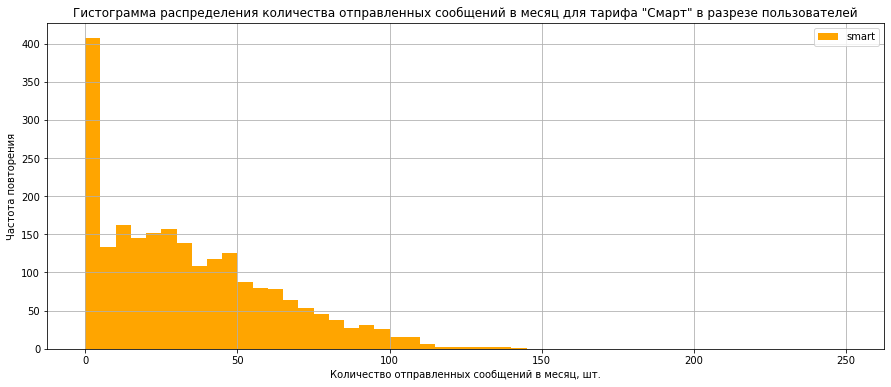

In [49]:
# построим гистограмму для count_of_messages
ax = smart.plot(
            kind='hist',
            y='count_of_messages',
            range=(0, 250),
            bins=50,
            linewidth=5,
            alpha=1.0,
            label='smart',
            figsize=(15,6),
            grid = True,
            color = 'orange');

# заголовок
ax.title.set_text('Гистограмма распределения количества отправленных сообщений в месяц для тарифа "Смарт" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Количество отправленных сообщений в месяц, шт.');
ax.set_ylabel('Частота повторения');

<div class="alert alert-block alert-info">
<font color='Black'>
    
Для тарифа "Ультра" среднее количество сообщений за месяц составляет 49 штук при включенном лимите 1000 сообщений, для тарифа "Смарт" - 33 штуки при включенном лимите 50 сообщений. Стандартное отклонение для тарифа "Ультра" составляет 48 сообщений, для тарифа "Смарт" 28 сообщений, для первого тарифа разброс данных и вариативность немного сильнее. Для первого и второго тарифов на гистограммах выделяются пики в значении 0, это говорит о том, что некоторые пользователи тарифов не пользуются сообщениями. Для тарифа "Ультра" на гистограмме видим, что пользователи не тратят больше включенного лимита в 1000 сообщений, для тарифа "Смарт" имеются пользователи, которые тратят больше включенного лимита в 50 сообщений.

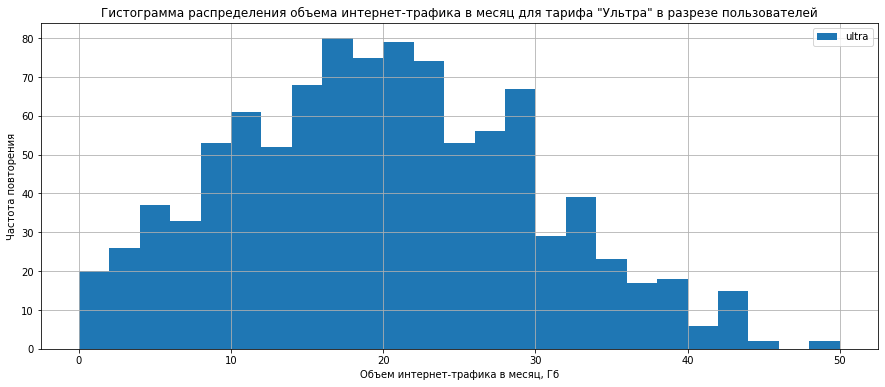

In [50]:
# построим гистограмму для gb_used_month
ax = ultra.plot(
            kind='hist',
            y='gb_used_month',
            range=(0, 50),
            bins=25,
            linewidth=5,
            alpha=1.0,
            label='ultra',
            figsize=(15,6),
            grid = True);
# заголовок
ax.title.set_text('Гистограмма распределения объема интернет-трафика в месяц для тарифа "Ультра" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Объем интернет-трафика в месяц, Гб');
ax.set_ylabel('Частота повторения');

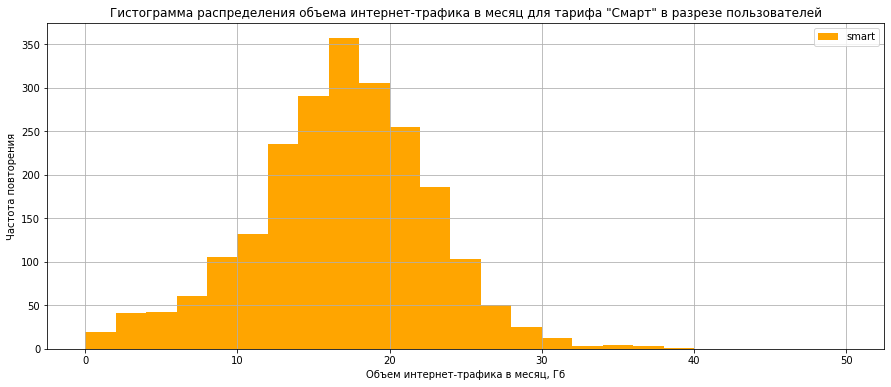

In [51]:
# построим гистограмму для gb_used_month
ax = smart.plot(
            kind='hist',
            y='gb_used_month',
            range=(0, 50),
            bins=25,
            linewidth=5,
            alpha=1.0,
            label='smart',
            figsize=(15,6),
            grid = True,
            color = 'orange');
# заголовок
ax.title.set_text('Гистограмма распределения объема интернет-трафика в месяц для тарифа "Смарт" в разрезе пользователей')
# подписи осей
ax.set_xlabel('Объем интернет-трафика в месяц, Гб');
ax.set_ylabel('Частота повторения');

<div class="alert alert-block alert-info">
<font color='Black'>
    
Для тарифа "Ультра" средний объем интернет-трафика за месяц составляет 20 Гб при включенном лимите 30 Гб, для тарифа "Смарт" средний объем интернет-трафика за месяц составляет 16 Гб при включенном лимите 15 Гб. Стандартное отклонение для тарифа "Ультра" составляет 10 Гб, для тарифа "Смарт" 6 Гб, для первого тарифа разброс данных и вариативность немного сильнее. Для двух тарифов на гистограммах видим, что имеются пользователи, которые используют больше включенного лимита, при этом для тарифа "Смарт" доля таких пользователей значительна.

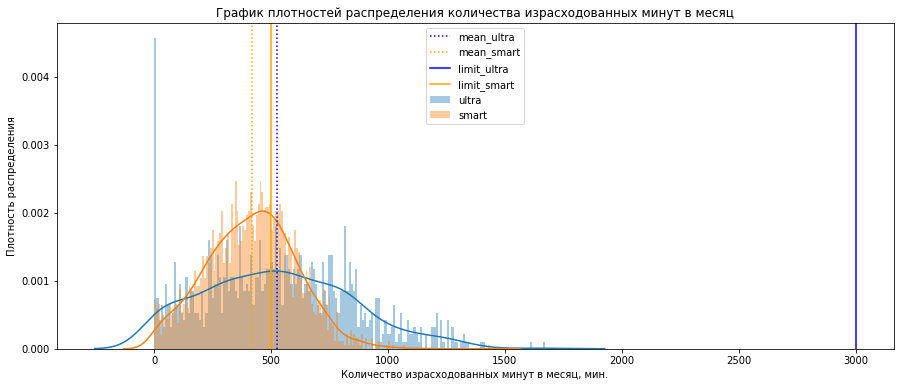

In [52]:
# построим графики плотностей распределений duration_month для двух тарифов 
plt.figure(figsize=(15, 6))
plt.title("График плотностей распределения количества израсходованных минут в месяц")
for tariff in ['ultra', 'smart']:
    subset = grouped_data[grouped_data['tariff'] == tariff]
    sns.distplot(subset['duration_month'], 
                 hist=True, 
                 bins=175,
                 label=tariff)
    
# построим прямую, соответствующую медиане
#plt.axvline(ultra['duration_month'].median(), color='b', linestyle='--', label='median_ultra')
#plt.axvline(smart['duration_month'].median(), color='orange', linestyle='--', label='median_smart')

# построим прямую, соответствующую среднему
plt.axvline(ultra['duration_month'].mean(), color='b', linestyle=':', label='mean_ultra')
plt.axvline(smart['duration_month'].mean(), color='orange', linestyle=':', label='mean_smart')

# построим прямую, соответствующую тарифному лимиту
plt.axvline(3000, color='b', linestyle='-', label='limit_ultra')
plt.axvline(500, color='orange', linestyle='-', label='limit_smart')

# подписи осей
plt.xlabel('Количество израсходованных минут в месяц, мин.')
plt.ylabel('Плотность распределения')

# отобразим легенду на графике
plt.legend();

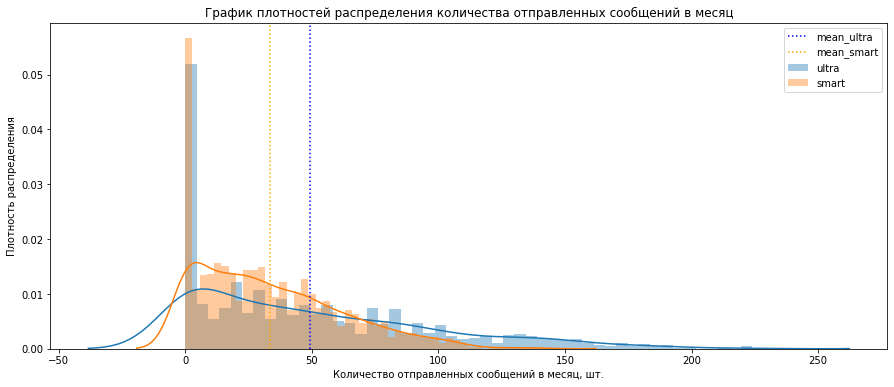

In [53]:
# построим графики плотностей распределений count_of_messages для двух тарифов 
plt.figure(figsize=(15, 6))
plt.title("График плотностей распределения количества отправленных сообщений в месяц")
for tariff in ['ultra', 'smart']:
    subset = grouped_data[grouped_data['tariff'] == tariff]
    sns.distplot(subset['count_of_messages'], 
                 hist = True, 
                 bins=50,
                 label = tariff)

# построим прямую, соответствующую медиане
#plt.axvline(ultra['count_of_messages'].median(), color='b', linestyle='--', label='median_ultra')
#plt.axvline(smart['count_of_messages'].median(), color='orange', linestyle='--', label='median_smart')

# построим прямую, соответствующую среднему
plt.axvline(ultra['count_of_messages'].mean(), color='b', linestyle=':', label='mean_ultra')
plt.axvline(smart['count_of_messages'].mean(), color='orange', linestyle=':', label='mean_smart')

# построим прямую, соответствующую тарифному лимиту
#plt.axvline(1000, color='b', linestyle='-', label='limit_ultra')
#plt.axvline(50, color='orange', linestyle='-', label='limit_smart')

# подписи осей
plt.xlabel('Количество отправленных сообщений в месяц, шт.')
plt.ylabel('Плотность распределения')

# отобразим легенду на графике
plt.legend();    

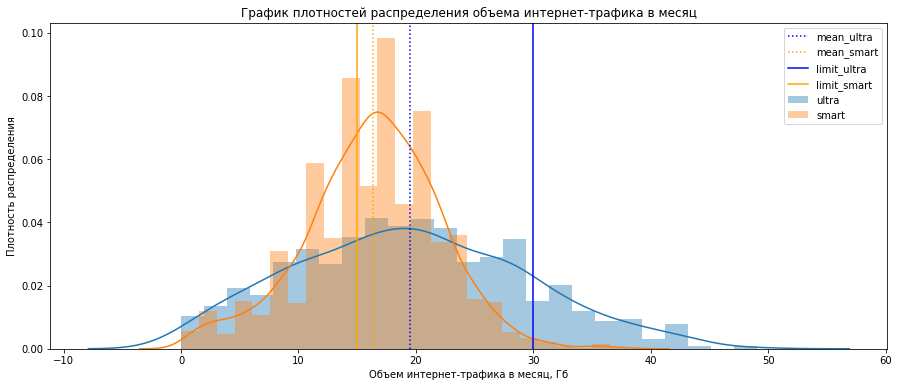

In [54]:
# построим графики плотностей распределений gb_used_month для двух тарифов 
plt.figure(figsize=(15, 6))
plt.title("График плотностей распределения объема интернет-трафика в месяц")
for tariff in ['ultra', 'smart']:
    subset = grouped_data[grouped_data['tariff'] == tariff]
    sns.distplot(subset['gb_used_month'], 
                 hist=True, 
                 bins=25,
                 label=tariff)

# построим прямую, соответствующую медиане
#plt.axvline(ultra['gb_used_month'].median(), color='b', linestyle='--', label='median_ultra')
#plt.axvline(smart['gb_used_month'].median(), color='orange', linestyle='--', label='median_smart')

# построим прямую, соответствующую среднему
plt.axvline(ultra['gb_used_month'].mean(), color='b', linestyle=':', label='mean_ultra')
plt.axvline(smart['gb_used_month'].mean(), color='orange', linestyle=':', label='mean_smart')    

# построим прямую, соответствующую тарифному лимиту
plt.axvline(30, color='b', linestyle='-', label='limit_ultra')
plt.axvline(15, color='orange', linestyle='-', label='limit_smart')

# подписи осей
plt.xlabel('Объем интернет-трафика в месяц, Гб')
plt.ylabel('Плотность распределения')

# отобразим легенду на графике
plt.legend();   

<div style="border:solid green 3px; padding: 20px">

1. Для тарифа "Ультра" средняя сумма израсходованных минут в месяц составляет 527 минут при включенном лимите 3000 минут, для тарифа "Смарт" - 418 минут при включенном лимите 500 минут. Для тарифа "Ультра" разброс данных и вариативность сильнее (об этом свидетельствует график распределения для "Ультра", он ниже и шире графика распределения для "Смарт"). Для тарифа "Ультра" на гистограмме выделяется пик в значении 0 минут, это говорит о том, что некоторые пользователи данного тарифа не используют включенные минуты. Пользователи "Ультра" не тратят больше 3000 минут - включенного лимита.
    
    
2. Для тарифа "Ультра" среднее количество сообщений за месяц составляет 49 штук при включенном лимите 1000 сообщений, для тарифа "Смарт" - 33 штуки при включенном лимите 50 сообщений. Для тарифа "Ультра" разброс данных и вариативность сильнее (об этом свидетельствует график распределения для "Ультра", он ниже и шире графика распределения для "Смарт"). Для первого и второго тарифов на гистограммах выделяются пики в значении 0, это говорит о том, что некоторые пользователи тарифов не пользуются сообщениями. Пользователи "Ультра" не тратят больше включенного лимита в 1000 сообщений.   
    
    
3. Для тарифа "Ультра" средний объем интернет-трафика за месяц составляет 20 Гб при включенном лимите 30 Гб, для тарифа "Смарт" средний объем интернет-трафика за месяц составляет 16 Гб при включенном лимите 15 Гб. Для тарифа "Ультра" разброс данных и вариативность сильнее (об этом свидетельствует график распределения для "Ультра", он ниже и шире графика распределения для "Смарт"). Средний объем интернет-трафика за месяц пользователей тарифа "Смарт" превышает установленный лимит. Для двух тарифов на гистограммах видим, что имеются пользователи, которые используют больше включенного лимита, при этом для тарифа "Смарт" доля таких пользователей значительна.    

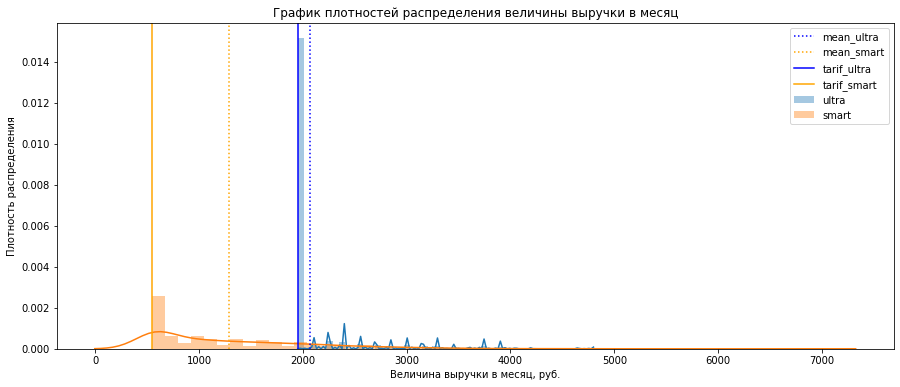

In [55]:
# построим графики плотностей распределений earnings для двух тарифов 
plt.figure(figsize=(15, 6))
plt.title("График плотностей распределения величины выручки в месяц")
for tariff in ['ultra', 'smart']:
    subset = grouped_data[grouped_data['tariff'] == tariff]
    sns.distplot(subset['earnings'], 
                 hist=True, 
                 bins=50,
                 label=tariff)

# построим прямую, соответствующую среднему
plt.axvline(ultra['earnings'].mean(), color='b', linestyle=':', label='mean_ultra')
plt.axvline(smart['earnings'].mean(), color='orange', linestyle=':', label='mean_smart')    

# построим прямую, соответствующую тарифному лимиту
plt.axvline(1950, color='b', linestyle='-', label='tarif_ultra')
plt.axvline(550, color='orange', linestyle='-', label='tarif_smart')

# подписи осей
plt.xlabel('Величина выручки в месяц, руб.')
plt.ylabel('Плотность распределения')

# отобразим легенду на графике
plt.legend();  

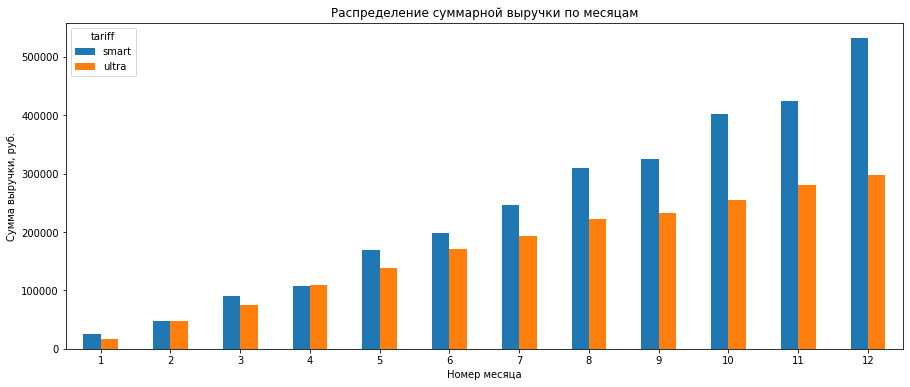

In [56]:
# построим график распределения суммарной выручки по месяцам
ax = (grouped_data
      .pivot_table(index='month', columns='tariff', values='earnings', aggfunc='sum')
      .plot(kind='bar', rot=0, figsize=(15,6)))

# заголовок
ax.title.set_text('Распределение суммарной выручки по месяцам')
# подписи осей
ax.set_xlabel('Номер месяца');
ax.set_ylabel('Сумма выручки, руб.');

<div style="border:solid green 3px; padding: 20px">
    
**Вывод по графику плотностей распределения:** для тарифа "Ультра" и для тарифа "Смарт" средние величины выручки в месяц находятся правее установленной платы по тарифам, т.е. превышают ее, об этом говорят длинные "хвосты" на графике, среди пользователей, которые платят сверх установленного тарифа, наблюдается сильный разброс значений. На графиках в области установленный платы по тарифам имеются пики, это говорит о том, что значительная часть пользователей расходует минуты / сообщения / интернет-трафик в пределах лимитов, установленных тарифами. Также для двух тарифов на гистограммах видим, что имеются пользователи, которые платят сверх установленный платы, при этом для тарифа "Смарт" доля таких пользователей больше, чем для тарифа "Ультра".
    
**Вывод по графику распределения суммарной выручки:**  суммарная выручка в месяц для тарифа "Смарт" практически всегда превышает суммарную выручку в месяц для тарифа "Ультра".    

## Проверка гипотез

<div class="alert alert-block alert-info">
<font color='Black'>
Проверим следующие гипотезы:
    
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


<div class="alert alert-block alert-info">
<font color='Black'>

Сформулируем гипотезу $Н_0$: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативную гипотезу $Н_1$ сформулируем следующим образом: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [57]:
# оценим размер имеющихся выборок по тарифам
print('Размер выборки для тарифа "Ультра":', ultra.shape[0])
print('Размер выборки для тарифа "Смарт" :', smart.shape[0])   

Размер выборки для тарифа "Ультра": 985
Размер выборки для тарифа "Смарт" : 2229


In [58]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

# воспользуемся специальным методом для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам
# выборки разного размера, поэтому параметр equal_var = False
result = st.ttest_ind(ultra['earnings'], 
                      smart['earnings'],
                      equal_var = False)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о равенстве средних выручек по тарифам")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве средних выручек по тарифам") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу о равенстве средних выручек по тарифам


<div class="alert alert-block alert-info">
<font color='Black'>

Сформулируем гипотезу $Н_0$: средняя выручка пользователей из Москвы и пользователей из других регионов равны.

Альтернативную гипотезу $Н_1$ сформулируем следующим образом: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [59]:
# выделим пользователей из Москвы в отдельный датафрейм
moscow = grouped_data.query('city == "Москва"')
# выделим пользователей из городов, отличных от Москвы, в отдельный датафрейм
other_cities = grouped_data.query('city != "Москва"')

In [60]:
# оценим размер имеющихся выборок по тарифам
print('Размер выборки для пользователей из Москвы       :', moscow.shape[0])
print('Размер выборки для пользователей из других регионов :', other_cities.shape[0])   

Размер выборки для пользователей из Москвы       : 611
Размер выборки для пользователей из других регионов : 2603


In [61]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу
alpha = .05 

# воспользуемся специальным методом для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам
# выборки разного размера, поэтому параметр equal_var = False
result = st.ttest_ind(moscow['earnings'], 
                      other_cities['earnings'],
                      equal_var = False)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о равенстве средних выручек пользователей из Москвы и пользователей из других регионов")
else:    
    print("Не получилось отвергнуть нулевую гипотезу о равенстве средних выручек пользователей из Москвы и пользователей из других регионов") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу о равенстве средних выручек пользователей из Москвы и пользователей из других регионов


In [62]:
# оценим размер выборок по пользователям для каждого из тарифов
print('Размер выборки пользователей для тарифа "Ультра":', users[ users['tariff'] == 'ultra']['user_id'].count())
print('Размер выборки пользователей ля тарифа "Смарт":', users[ users['tariff'] == 'smart']['user_id'].count()) 
print()

ratio_ultra = users[ users['tariff'] == 'ultra']['user_id'].count() / users['user_id'].count()
ratio_smart = users[ users['tariff'] == 'smart']['user_id'].count() / users['user_id'].count()
print(f'Доля пользователей тарифа "Ультра" в выборке: {ratio_ultra:.1%}')
print(f'Доля пользователей тарифа "Смарт"  в выборке: {ratio_smart:.1%}')   
print()

print('Средняя выручка пользователей тарифа "Ультра" в выборке:', round(ultra['earnings'].mean(),2))
print('Средняя выручка пользователей тарифа "Смарт"  в выборке:', round(smart['earnings'].mean(),2))

print()
print('Соотношениие средней выручки пользователей тарифа "Ультра" к средней выручке пользователей тарифа "Смарт":', 
      round(ultra['earnings'].mean() / smart['earnings'].mean(),2))

Размер выборки пользователей для тарифа "Ультра": 149
Размер выборки пользователей ля тарифа "Смарт": 351

Доля пользователей тарифа "Ультра" в выборке: 29.8%
Доля пользователей тарифа "Смарт"  в выборке: 70.2%

Средняя выручка пользователей тарифа "Ультра" в выборке: 2070.15
Средняя выручка пользователей тарифа "Смарт"  в выборке: 1289.97

Соотношениие средней выручки пользователей тарифа "Ультра" к средней выручке пользователей тарифа "Смарт": 1.6


<div style="border:solid green 3px; padding: 20px">
С использованием статистических t-тестов с критическим уровнем значимости в 5% проверили две гипотезы:
        
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза о различии средних выручек пользователей тарифов «Ультра» и «Смарт» принимается.
Гипотеза о различии средних выручек пользователей из Москвы и пользователей из других регионов отвергается.      
    

## Общий вывод

<div style="border:solid green 3px; padding: 20px">
    
        
- **Краткий обзор проекта** 
    
    Проанализировали данные 500 пользователей федерального оператора сотовой связи «Мегалайна» за 2018 год. Исследовали поведение клиентов оператора, исходя из выборки. Проверим следующие гипотезы:
    
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    

- **Главные выводы** 
    
    Особенности использования тарифов:
   
    - для тарифа "Ультра" разброс данных и вариативность сильнее, чем для тарифа "Смарт";
    - "Ультра": некоторые пользователи данного тарифа не используют включенные минуты и не пользуются сообщениями. Все пользователи не тратят больше 3000 минут - включенного лимита и не тратят больше включенного лимита в 1000 сообщений. Среди пользователей тарифа имеются пользователи, которые используют больше включенного лимита интернет-трафика;  
    - "Смарт": некоторые пользователи данного тарифа не пользуются сообщениями. Средний объем интернет-трафика за месяц превышает установленный лимит, доля пользователей, превышающих данный лимит, значительна.
    
    Гипотеза о различии средних выручек пользователей тарифов «Ультра» и «Смарт» принимается. На основе выборки можно сделать вывод, что средняя выручка пользователей тарифа «Ультра» больше средней выручки пользователей тарифа «Смарт» в 1,6 раза.
    
    Гипотеза о различии средних выручек пользователей из Москвы и пользователей из других регионов отвергается.     

    
- **Рекомендации**
    
    Принимая во внимание соотношение числа пользователей тарифа "Ультра" к числу пользователей тарифа "Смарт" (3:7), а также средние значения выручки по каждому из тарифов, можно сделать вывод о том, что для оператора «Мегалайн» тариф "Смарт" приносит больше выручки, чем тариф "Ультра", поскольку тариф "Смарт" является более популярным среди пользователей.